# Import and Dataset

In [236]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [237]:
df = pd.read_csv(r'Sport car price.csv')

In [238]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [240]:
# convert datatypes
df.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [241]:
df.shape

(1007, 8)

In [242]:
# Clean and preprocess data
# Remove commas and convert 'Price (in USD)' to numeric
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '').astype(float)

# Convert 'Horsepower', 'Torque (lb-ft)', and '0-60 MPH Time (seconds)' to numeric
for column in ['Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Handle 'Engine Size (L)'
# Create a column for hybrids: flag rows with '+' in the value or containing 'Hybrid'
df['Hybrid'] = df['Engine Size (L)'].str.contains(r'\+|Hybrid', case=False, na=False)

# Create a column for electric vehicles: flag rows containing 'Electric'
df['Electric'] = df['Engine Size (L)'].str.contains('Electric', case=False, na=False)

# Replace invalid entries in 'Engine Size (L)' with NaN, then extract and convert numeric parts
df['Engine Size (L)'] = pd.to_numeric(
    df['Engine Size (L)'].str.extract(r'([\d.]+)')[0], errors='coerce'
)


# Handle missing values (e.g., fill missing 'Engine Size (L)' with 0 or other strategies)
df['Engine Size (L)'] = df['Engine Size (L)'].fillna(0)  # Default to 0 for missing engine sizes
#do for horsepower torque and 0-60 mph time
df['Horsepower'] = df['Horsepower'].fillna(0)  # Default to 0 for missing horsepower
df['Torque (lb-ft)'] = df['Torque (lb-ft)'].fillna(0)  # Default to 0 for missing torque
df['0-60 MPH Time (seconds)'] = df['0-60 MPH Time (seconds)'].fillna(0)  # Default to 0 for missing 0-

df



,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
0,Porsche,911,2022,3.0,379.0,331.0,4.00,101200.0,False,False
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.80,274390.0,False,False
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.00,333750.0,False,False
3,Audi,R8,2022,5.2,562.0,406.0,3.20,142700.0,False,False
4,McLaren,720S,2021,4.0,710.0,568.0,2.70,298000.0,False,False
...,...,...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.0,1280.0,1106.0,2.50,3000000.0,False,False
1003,Lotus,Evija,2021,0.0,1972.0,1254.0,2.00,2000000.0,False,True
1004,McLaren,Senna,2021,4.0,789.0,590.0,2.70,1000000.0,False,False
1005,Pagani,Huayra,2021,6.0,764.0,738.0,3.00,2600000.0,False,False


In [243]:
#Display the hybrid column is true and get the rows that are true
df[df['Hybrid'] == True]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
42,BMW,i8,2020,1.5,369.0,420.0,4.2,148500.0,True,True
626,Porsche,Panamera Turbo S E-Hybrid,2021,4.0,690.0,641.0,3.0,186350.0,True,False
732,BMW,i8,2022,0.0,369.0,184.0,4.2,148500.0,True,False
855,Ferrari,SF90 Stradale,2021,4.0,986.0,590.0,2.5,625000.0,True,False
967,Porsche,Panamera Turbo S E-Hybrid,2021,0.0,689.0,642.0,3.0,190000.0,True,False


In [244]:
df.shape

(1007, 10)

In [245]:
# diplay all the cars years that are less than 1980 and electric
df[(df['Year'] < 2000) & (df['Electric'] == False)]


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
170,Shelby,Cobra,1965,7.0,435.0,440.0,4.2,1000000.0,False,False


In [246]:
# #Visualizing the data
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.pairplot(df)
# plt.show()


In [247]:
# #create a hist plot for the price vs year
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Year', y='Price (in USD)', bins=30, color='blue', kde=True)
# plt.show()


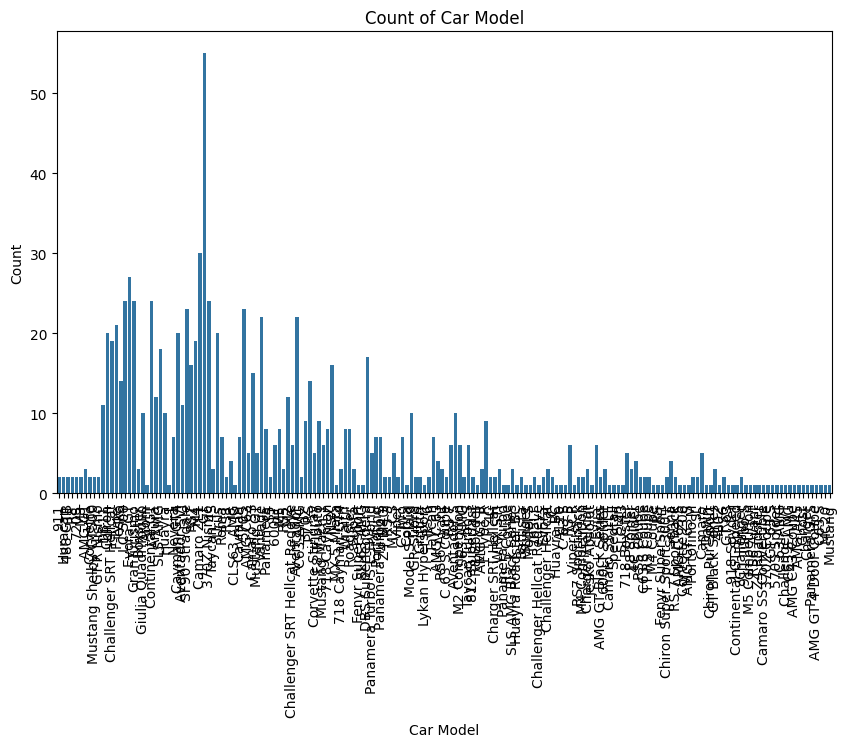

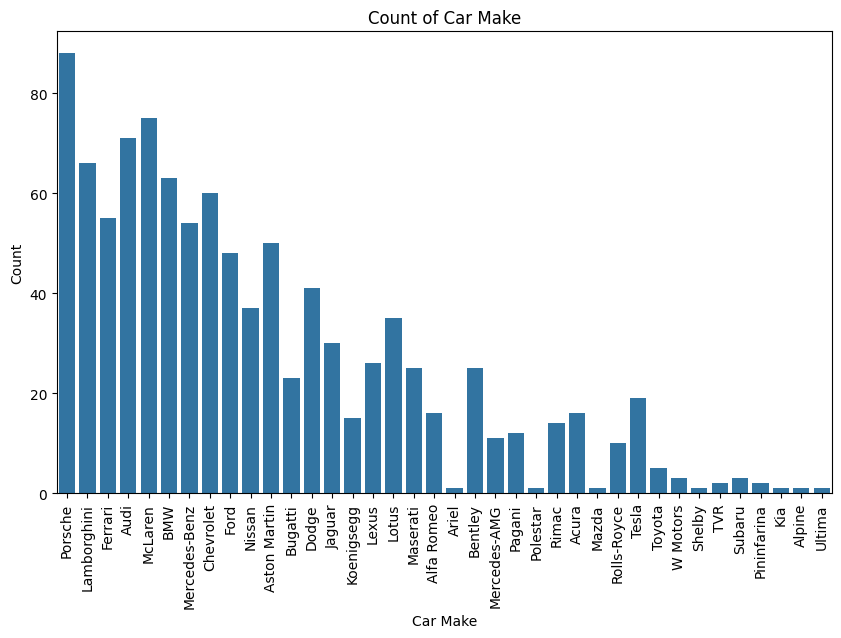

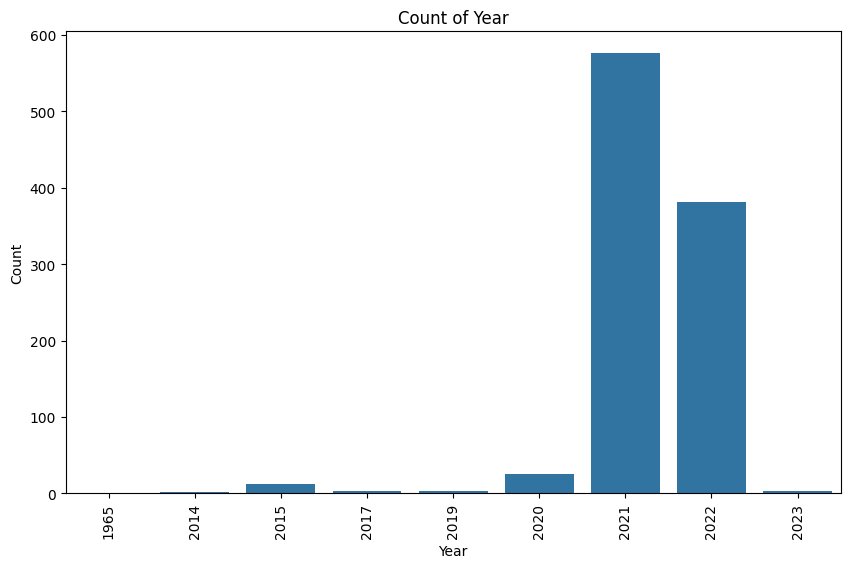

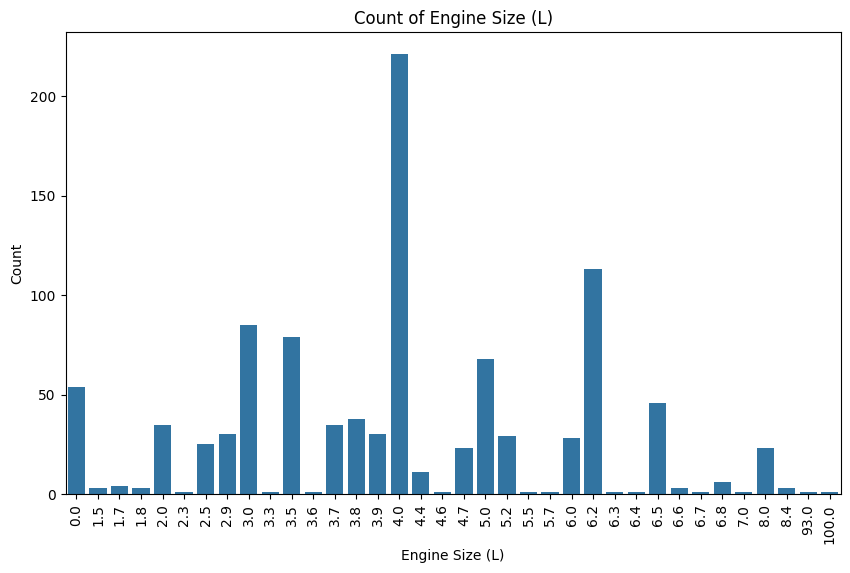

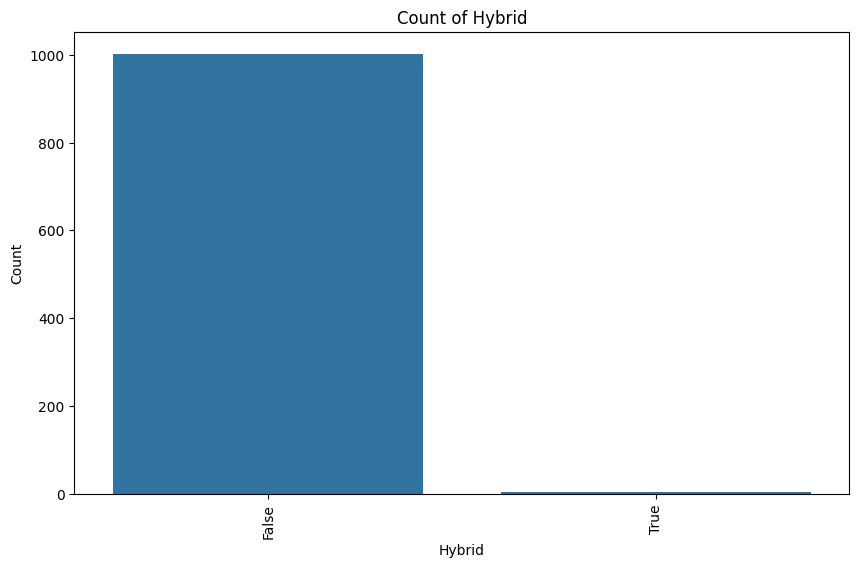

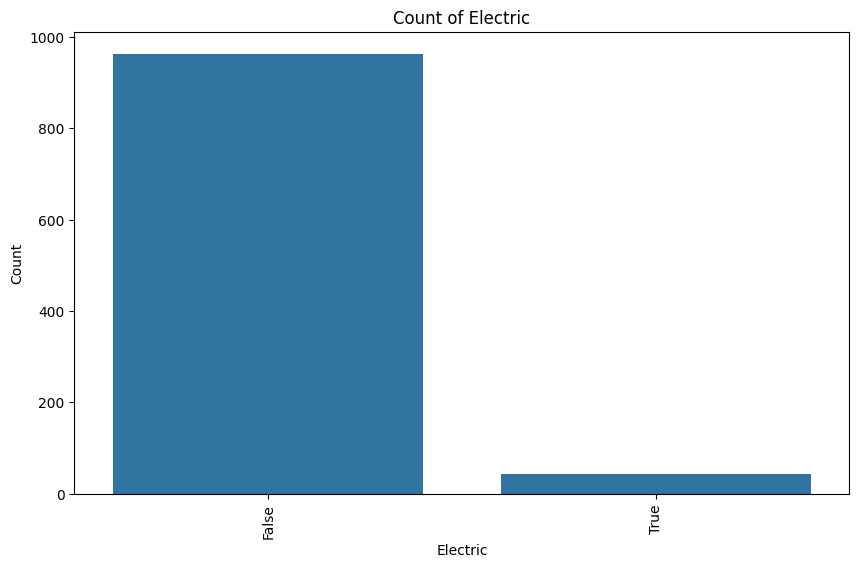

In [248]:
bar_graphs = ['Car Model', 'Car Make','Year','Engine Size (L)', 'Hybrid', 'Electric']

# Create individual plots
for column in bar_graphs:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   object 
 1   Car Model                1007 non-null   object 
 2   Year                     1007 non-null   int64  
 3   Engine Size (L)          1007 non-null   float64
 4   Horsepower               1007 non-null   float64
 5   Torque (lb-ft)           1007 non-null   float64
 6   0-60 MPH Time (seconds)  1007 non-null   float64
 7   Price (in USD)           1007 non-null   float64
 8   Hybrid                   1007 non-null   bool   
 9   Electric                 1007 non-null   bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 65.0+ KB


In [250]:
df.isnull().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
Hybrid                     0
Electric                   0
dtype: int64

In [251]:
# def get_redundant_pairs(X):
#     pairs_to_drop = set()
#     cols = X.columns
#     for i in range(0, X.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=1):
#     au_corr = X.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(X)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations !")
# print(get_top_abs_correlations(df.select_dtypes(include=['int32','int64']), 10))

In [252]:
#show all the rows that have null
df[df.isnull().any(axis=1)]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric


In [253]:
# for col in ['Car Make', 'Car Model']:
#     mean_target = df.groupby(col)['Price (in USD)'].mean()  # Compute mean price for each category
#     df[col] = df[col].map(mean_target)  # Replace categories with the mean price

#Encoding by maing each car model and car make a distinct number
df['Car Make'] = pd.Categorical(df['Car Make'])
df['Car Model'] = pd.Categorical(df['Car Model'])
df['Car Make'] = df['Car Make'].cat.codes
df['Car Model'] = df['Car Model'].cat.codes

df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
0,28,18,2022,3.0,379.0,331.0,4.00,101200.0,False,False
1,16,98,2021,5.2,630.0,443.0,2.80,274390.0,False,False
2,11,5,2022,3.9,661.0,561.0,3.00,333750.0,False,False
3,5,130,2022,5.2,562.0,406.0,3.20,142700.0,False,False
4,21,15,2021,4.0,710.0,568.0,2.70,298000.0,False,False
...,...,...,...,...,...,...,...,...,...,...
1002,15,99,2022,5.0,1280.0,1106.0,2.50,3000000.0,False,False
1003,18,76,2021,0.0,1972.0,1254.0,2.00,2000000.0,False,True
1004,21,157,2021,4.0,789.0,590.0,2.70,1000000.0,False,False
1005,25,95,2021,6.0,764.0,738.0,3.00,2600000.0,False,False


In [254]:
# import matplotlib.pyplot as plt 
# import seaborn as sns

# # Calculate the correlation matrix
# corr_matrix = df.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix')

In [255]:
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Hybrid,Electric
0,28,18,2022,3.0,379.0,331.0,4.0,101200.0,False,False
1,16,98,2021,5.2,630.0,443.0,2.8,274390.0,False,False
2,11,5,2022,3.9,661.0,561.0,3.0,333750.0,False,False
3,5,130,2022,5.2,562.0,406.0,3.2,142700.0,False,False
4,21,15,2021,4.0,710.0,568.0,2.7,298000.0,False,False


In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features (X) and target (y)
Columns = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Hybrid', 'Electric']

# Drop the columns that are not needed
X = df.drop(['Price (in USD)'], axis=1)

# Apply log transformation to the target variable
y = np.log1p(df['Price (in USD)'])


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions for Linear Regression
y_pred_linear = linear_model.predict(X_test)

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predictions for Polynomial Regression
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate both models
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

# Print results
print("Linear Regression:")
print(f"Mean Absolute Error: {linear_mae}")
print(f"R-squared: {linear_r2}")

print("\nPolynomial Regression (Degree=2):")
print(f"Mean Absolute Error: {poly_mae}")
print(f"R-squared: {poly_r2}")

Linear Regression:
Mean Absolute Error: 0.41260151228473224
R-squared: 0.6749971571259199

Polynomial Regression (Degree=2):
Mean Absolute Error: 0.8648692012774621
R-squared: -11.780208466421646


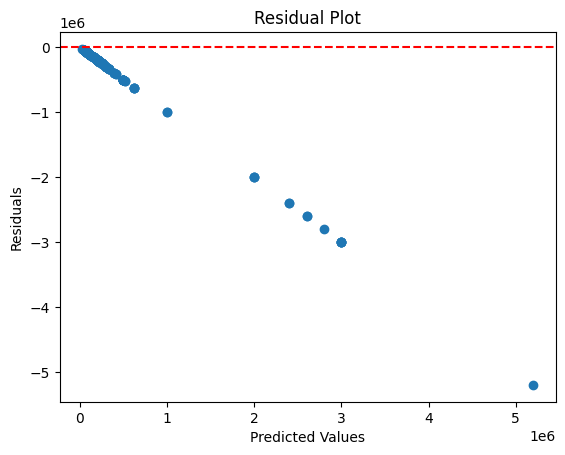

In [257]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
